# Cleaning Residentials Data
[Data Source](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/N3HGRN)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
import re

# Data source location
files = glob.glob('./household_power_consumption/dataverse_files/Residential_*.csv')

# sort files in numerical order
files.sort(key=lambda f: int(re.sub('\D', '', f)))

# split dataset in different dataframes
# each file is a residential
residentials = [pd.read_csv(f, sep=',', low_memory=False) for f in files]

print('Amount of different residentials: ' + str(len(residentials)))

Amount of different residentials: 28


In [3]:
residentials[5].head()

,date,hour,energy_kWh
0,2015-01-30,0,0.69
1,2015-01-30,1,0.57
2,2015-01-30,2,0.43
3,2015-01-30,3,0.22
4,2015-01-30,4,0.23


In [4]:
total = 0

for residential in residentials:
    total += len(residential)
    
print("Amount of rows: " + str(total))
print("Amount of columns: " + str(len(residentials[0].columns)))

Amount of rows: 616055
Amount of columns: 3


In [5]:
residentials[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29231 entries, 0 to 29230
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        29231 non-null  object 
 1   hour        29231 non-null  int64  
 2   energy_kWh  29231 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 685.2+ KB


In [6]:
# convert date to datetime type
for residential in residentials:
    residential['date'] = pd.to_datetime(residential['date'])
    
residentials[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29231 entries, 0 to 29230
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        29231 non-null  datetime64[ns]
 1   hour        29231 non-null  int64         
 2   energy_kWh  29231 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 685.2 KB


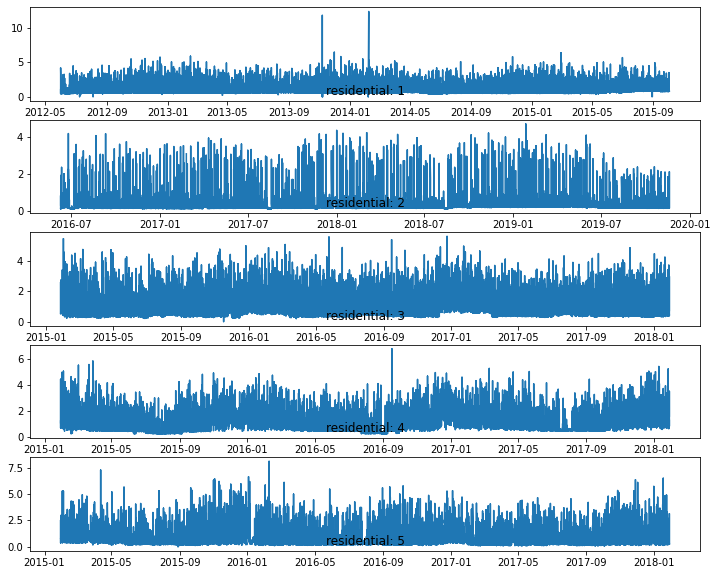

In [7]:
plt.figure(figsize=(12,10))

# visualise data per day for 5 household
for x in range(5):
    ax = plt.subplot(5, 1, 1+x)
    plt.plot(residentials[x]['date'], residentials[x]['energy_kWh'])
    plt.title('residential: '+str(x+1), y=0)
plt.show()

# some missing data for the residentials

In [8]:
total = 0

for residential in residentials:
    total += residential['energy_kWh'].isnull().sum()

print(f'Total missing values: {total}')

Total missing values: 5037


In [9]:
total = 0

# drop rows with null values
for residential in residentials:
    residential.dropna(subset=['energy_kWh'], inplace=True)
    total += len(residential)
    
print("Amount of rows: " + str(total))

Amount of rows: 611018


In [10]:
# convert hour int to timestamp
for residential in residentials:
    res = pd.to_datetime(residential['hour'], format='%H')
    residential['Time'] = res.dt.time
    
residentials[0].head()

,date,hour,energy_kWh,Time
0,2012-06-01,1,1.011,01:00:00
1,2012-06-01,2,0.451,02:00:00
2,2012-06-01,3,0.505,03:00:00
3,2012-06-01,4,0.441,04:00:00
4,2012-06-01,5,0.468,05:00:00


In [11]:
import random

# every household in Metro Vancouver area or Vancouver Island in British Columbia
# latitude range: 48.943754, 50.339788
# lonitude range: -122.119014, -126.587438

for residential in residentials:
    # add latitude and longitude column with random place in the area
    residential["Latitude"] = round(random.uniform(48.943754, 50.339788), 6)
    residential["Longitude"] = round(random.uniform(-122.119014, -126.587438), 6)

residentials[0].head()

,date,hour,energy_kWh,Time,Latitude,Longitude
0,2012-06-01,1,1.011,01:00:00,49.210722,-126.104206
1,2012-06-01,2,0.451,02:00:00,49.210722,-126.104206
2,2012-06-01,3,0.505,03:00:00,49.210722,-126.104206
3,2012-06-01,4,0.441,04:00:00,49.210722,-126.104206
4,2012-06-01,5,0.468,05:00:00,49.210722,-126.104206


In [12]:
# create new dataframe and reformat the data

# available data from dataset
# House_or_apartment
# Heating_type

# apartment => 6, 12, 16, 17, 22, 23, 26, 27
# heating type => all gas (1)

residentials_filtered = []

for residential in residentials:
    residential.rename(columns={'date':'Date', 'energy_kWh':'Global_active_power'}, inplace=True)

    res_filtered = residential[['Date', 'Time', 'Latitude', 'Longitude', 'Global_active_power']]

    res_filtered.insert(4,'House_or_apartment', 0) # 0 house, 1 apartment
    res_filtered.insert(5,'Area_of_residence', 0) # to be inserted in meters squared
    res_filtered.insert(6,'House_is_isolated', 0) # 0 no, 1 yes
    res_filtered.insert(7,'Number_of_residents', 0) # to be an unsigned number
    res_filtered.insert(8,'Heating_type', 1) # 0 electrical, 1 gas
    res_filtered.insert(9,'Solar_panels', 0) # 0 don't use, 1 use
    residentials_filtered.append(res_filtered)

residentials_filtered[0].head()

,Date,Time,Latitude,Longitude,House_or_apartment,Area_of_residence,House_is_isolated,Number_of_residents,Heating_type,Solar_panels,Global_active_power
0,2012-06-01,01:00:00,49.210722,-126.104206,0,0,0,0,1,0,1.011
1,2012-06-01,02:00:00,49.210722,-126.104206,0,0,0,0,1,0,0.451
2,2012-06-01,03:00:00,49.210722,-126.104206,0,0,0,0,1,0,0.505
3,2012-06-01,04:00:00,49.210722,-126.104206,0,0,0,0,1,0,0.441
4,2012-06-01,05:00:00,49.210722,-126.104206,0,0,0,0,1,0,0.468


In [13]:
# change value for the resident list to apartments (dataset information)
apartments = [6, 12, 16, 17, 22, 23, 26, 27]

for x in apartments:
    residentials_filtered[x-1] = residentials_filtered[x-1].assign(House_or_apartment = 1)

residentials_filtered[5].head()

,Date,Time,Latitude,Longitude,House_or_apartment,Area_of_residence,House_is_isolated,Number_of_residents,Heating_type,Solar_panels,Global_active_power
0,2015-01-30,00:00:00,49.821259,-122.735974,1,0,0,0,1,0,0.69
1,2015-01-30,01:00:00,49.821259,-122.735974,1,0,0,0,1,0,0.57
2,2015-01-30,02:00:00,49.821259,-122.735974,1,0,0,0,1,0,0.43
3,2015-01-30,03:00:00,49.821259,-122.735974,1,0,0,0,1,0,0.22
4,2015-01-30,04:00:00,49.821259,-122.735974,1,0,0,0,1,0,0.23


In [14]:
for i, _df in enumerate(residentials_filtered):
    filename = './household_power_consumption/dataverse_files_cleaned/Residential_' + str(i+1) + '.csv'
    print(filename)
    _df.to_csv(filename)

./household_power_consumption/dataverse_files_cleaned/Residential_1.csv
./household_power_consumption/dataverse_files_cleaned/Residential_2.csv
./household_power_consumption/dataverse_files_cleaned/Residential_3.csv
./household_power_consumption/dataverse_files_cleaned/Residential_4.csv
./household_power_consumption/dataverse_files_cleaned/Residential_5.csv
./household_power_consumption/dataverse_files_cleaned/Residential_6.csv
./household_power_consumption/dataverse_files_cleaned/Residential_7.csv
./household_power_consumption/dataverse_files_cleaned/Residential_8.csv
./household_power_consumption/dataverse_files_cleaned/Residential_9.csv
./household_power_consumption/dataverse_files_cleaned/Residential_10.csv
./household_power_consumption/dataverse_files_cleaned/Residential_11.csv
./household_power_consumption/dataverse_files_cleaned/Residential_12.csv
./household_power_consumption/dataverse_files_cleaned/Residential_13.csv
./household_power_consumption/dataverse_files_cleaned/Reside